### IMBD Movie review Classification Project

***

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

You can also download the dataset <a href = "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews">here </a>

***

### Import necessary libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Read IMDB Dataset

In [9]:
df = pd.read_csv('IMDB Dataset.csv')

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### View descriptive stats

In [14]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### Check for imbalanced data

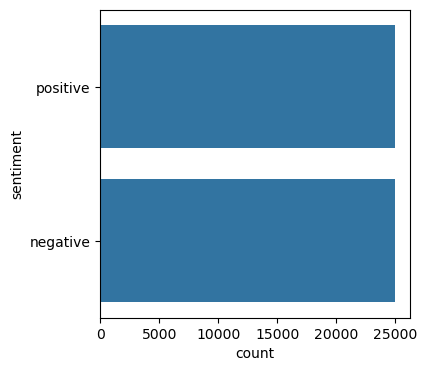

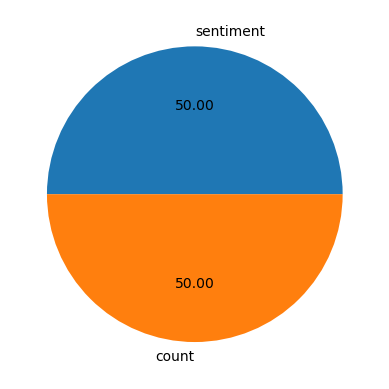

In [27]:
plt.figure (figsize=(4,4))
sns.countplot(y = 'sentiment', data = df)
plt.show()

plt.pie(df['sentiment'].value_counts(),labels=['sentiment','count'],autopct='%0.02f')
plt.show()

### Create a function to Preprocess the review column

In [29]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [31]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Print some text after applying the function

In [34]:
for i in range(10):
    print(df['review'][i])
    print()

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

### Split the dataset into Input (X) & Target (y) variable

In [37]:
x = df['review']
y = df['sentiment']

### Convert y variable values into 0 and 1 from positive and negative

In [40]:
y = y.map({'positive':1, 'negative':0})

In [42]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [46]:
tokenizer = Tokenizer(num_words=5000)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20)

In [48]:
tokenizer.fit_on_texts(x_train)

In [49]:
tokenizer.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'movie',
 16: 'for',
 17: 'with',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'you',
 22: 'not',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'be',
 27: 'one',
 28: 'he',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'so',
 35: 'from',
 36: 'who',
 37: 'like',
 38: 'or',
 39: 'just',
 40: 'her',
 41: 'out',
 42: 'about',
 43: 'if',
 44: "it's",
 45: 'has',
 46: 'there',
 47: 'some',
 48: 'what',
 49: 'good',
 50: 'when',
 51: 'more',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'even',
 57: 'my',
 58: 'she',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'really',
 63: 'see',
 64: 'story',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'me',
 69: 'were',
 70: 'well',
 71: 'much',
 72: 'we',
 73: 'than',
 74: 'bad',
 75: 'get',
 76: 'do',
 77: 'been',
 78: 'great',
 79: 'will',
 80: 'other',
 81: 'also',
 82: 'into',
 83

In [50]:
vocab_size = len(tokenizer.word_index) + 1

In [57]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)

    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)

    return padded_sequence

In [59]:
x_train = text_encoding(x_train)
x_test = text_encoding(x_test)

In [60]:
vocab_size

112106

### Split the dataset into Training & Testing set

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

### Create keras Sequential Model with LSTM Layers

In [69]:
from keras import Sequential
from keras import layers

In [71]:
print(f'shape of x_train : {(x_train.shape)}')
print(f'shape of x_test : {(x_test.shape)}')

shape of x_train : (40000, 128)
shape of x_test : (10000, 128)


In [73]:
model = Sequential()
### Embedding layer
model.add(layers.Embedding(vocab_size,output_dim=128))

### Lstm layer
### return_sequences: Whether to return the last output in the output sequence, or the full sequence.
model.add(layers.LSTM(128,  return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='softmax'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [75]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Compile the model

### Train the model with our training set

### Make prediction with X_test

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 365s 358ms/step - accuracy: 0.5014 - loss: 0.4859 - val_accuracy: 0.5035 - val_loss: 0.3508
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 374s 374ms/step - accuracy: 0.4961 - loss: 0.2785 - val_accuracy: 0.5035 - val_loss: 0.3326
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 393s 392ms/step - accuracy: 0.4970 - loss: 0.1988 - val_accuracy: 0.5035 - val_loss: 0.3015
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 373s 373ms/step - accuracy: 0.4966 - loss: 0.1627 - val_accuracy: 0.5035 - val_loss: 0.3293
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 375s 375ms/step - accuracy: 0.4938 - loss: 0.1256 - val_accuracy: 0.5035 - val_loss: 0.3858
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 365s 365ms/step - accuracy: 0.4949 - loss: 0.0956 - val_accuracy: 0.5035 - val_loss: 0.3939
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 355s 355ms/step - accuracy: 0.4922 - loss: 0.0704 - val_accuracy: 0.5035 - val_loss: 0.4926
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 366s 366ms/step - accuracy: 0.4

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
len(y_pred)

In [ ]:
len(y_test)

In [ ]:
y_pred = [np.argmax(i) for i in y_pred]

In [ ]:
y_pred[0]

### Convert to 0 and 1 with higher probability towards 1

### Evaluate the model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Check accuracy score

In [ ]:
accuracy_score(y_test, y_pred)

### Check confusion matrix

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')

### Print Classification report

In [ ]:
print(classification_report(y_test, y_pred))

***